# PREDICTING SURVIVAL FROM THE TITANIC SHIP DISASTER

The RMS Titanic sunk on April 15, 1912, during her maiden voyage after colliding with an iceberg, the ship wrekege killed 1502 out of 2224 passengers and crew. This tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

This analysis and predictive model gives an indication of the passengers who were more likely to survive.

In [101]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline


## Getting the Data

In [103]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
print('We have', train.shape[0],'in the train data set and', test.shape[0],\
      'in the test with total of', train.shape[0]+test.shape[0])

We have 891 in the train data set and 418 in the test with total of 1309


## Data Exploration/Analysis

In [104]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [105]:
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [106]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


The training-set has 12 features including the target variable (survived). 2 of the features are floats,
5 are integers and 5 are objects. We shall need to convert the object features into numeric later on so 
that machine learning algorithms can process them.

In [107]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Above we can see that 38% out of the training-set survived the Titanic. We can also see that the passenger ages range from 0.4 
to 80. On top of that we can already detect some features, that contain missing values, like the ‘Age’, feature.

# Data preprocessing

## Dealing with missing values

In [108]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

From the above result we see that has 177 missing values while cabin has 77% of its results missing. 
In this case it's more advisable to drop the cabin feature

In [109]:
train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

For missing values in 'age' we can first investigate to see how it is
distributed against the class.

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


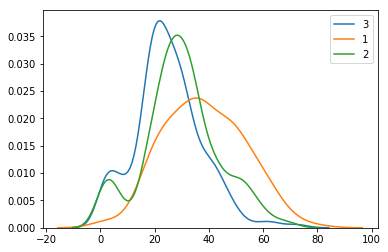

In [110]:
for Pclass in train['Pclass'].unique():
    sns.kdeplot(train[train['Pclass']==Pclass]['Age'], label=Pclass)
    

From the above gragh we can clearly see that the age is fairly normally 
distributed with clear difeerence among the classes. In this case we can use the
mean of the age in the different classes to fill in the missing values.

In [111]:
train.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [112]:
for clas in train['Pclass'].unique():
    train.loc[train['Pclass']==clas, 'Age'] = train.groupby('Pclass')['Age'].mean().loc[clas]
for clas in test['Pclass'].unique():
    test.loc[test['Pclass']==clas, 'Age']=test.groupby('Pclass')['Age'].mean().loc[clas]

We can drop the PassngerId column since it will be of no significance to the analysis and prediction.

In [113]:
train.drop('PassengerId', axis=1, inplace=True)
test.drop('PassengerId', axis=1, inplace=True)

In [114]:
#train['Age']=train['Age'].astype('int')
test['Age']=test['Age'].astype('int')

## For missing values of Embarked

In [116]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Since the majority of the passengers embarked at "S" which accounts for 72%. We can set the remaining 2 missing values as "s".

In [119]:
train['Embarked']=train['Embarked'].fillna('S')

In [120]:
for cl in test['Pclass'].unique():
    test.loc[test['Pclass']==cl, 'Fare'] = test.groupby('Pclass')['Fare'].mean().loc[cl]

In [123]:
train.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

Now there are no more missing values in the data set

In [21]:
train.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,25.140620,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.233441,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,25.140620,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,38.233441,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,25.140620,0,0,373450,8.0500,S


# DATA ANALYSIS

To a get a quick in sight into how the survival rate was affected by the diffrent attributes,
we will use the clustered bar chart for visual analysis

In [22]:
def bar_chart(feat):
    survived=train[train['Survived']==1][feat].value_counts()
    dead=train[train['Survived']==0][feat].value_counts()
    df=pd.DataFrame([survived,dead])
    df.index=['Survived','Dead']
    df.plot(kind='bar', stacked=True, figsize=(5,6))
    

## Pclass

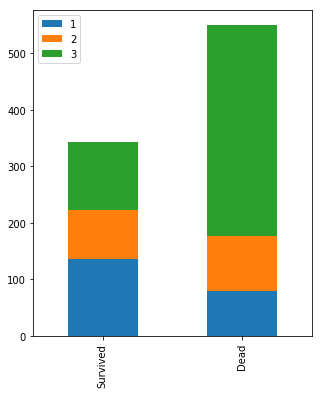

In [23]:
bar_chart('Pclass')

In [134]:
pd.DataFrame(train.groupby('Pclass')['Survived'].value_counts())

Survived
Pclass Survived          
1      1              136
       0               80
2      0               97
       1               87
3      0              372
       1              119

From the bar chart we can clearly see that 'Pclass' contributed to survival rate. Class'1' 
had a higher percentage of survivors with . Class '3' took up a bigger portion of the dead.
Pclass really seems to be corellated to survival.


## Sex

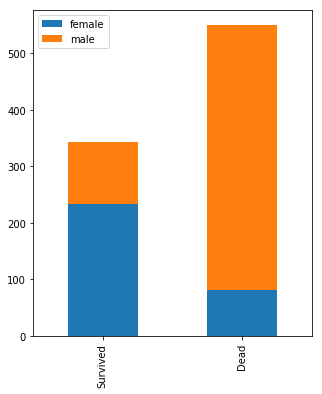

In [24]:
bar_chart('Sex')

In [131]:
pd.DataFrame(train.groupby('Survived')['Sex'].value_counts())

Sex
Survived Sex        
0        male    468
         female   81
1        female  233
         male    109

In [135]:
train['Sex'].replace({'male':0, 'female':1}, inplace=True)

In [136]:
test['Sex'].replace({'male':0, 'female':1}, inplace=True)

In [137]:
train.drop('Ticket', axis=1, inplace=True)

In [138]:
test.drop('Ticket', axis=1, inplace=True)

## Embarked

### ONE HOT CODING

In [143]:
#train['Embarked'].replace({'S':0, 'C':1, 'Q':2}, inplace=True)
#test['Embarked'].replace({'S':0, 'C':1, 'Q':2}, inplace=True)
train['Embarked_S']=0
train['Embarked_C']=0
train['Embarked_Q']=0

train.loc[train['Embarked']=='S', 'Embarked_S']=1
train.loc[train['Embarked']=='C', 'Embarked_C']=1
train.loc[train['Embarked']=='Q', 'Embarked_Q']=1

KeyError: 'Embarked'

In [144]:
train.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked_S,Embarked_C,Embarked_Q
0,0,3,"Braund, Mr. Owen Harris",0,25.140620,1,0,7.2500,0,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.233441,1,0,71.2833,0,0,0
2,1,3,"Heikkinen, Miss. Laina",1,25.140620,0,0,7.9250,0,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,38.233441,1,0,53.1000,0,0,0
4,0,3,"Allen, Mr. William Henry",0,25.140620,0,0,8.0500,0,0,0


In [141]:
train.drop('Embarked', axis=1, inplace=True)
test.drop('Embarked', axis=1, inplace=True)

In [145]:
#train['Embarked'].replace({'S':0, 'C':1, 'Q':2}, inplace=True)
#test['Embarked'].replace({'S':0, 'C':1, 'Q':2}, inplace=True)
test['Embarked_S']=0
test['Embarked_C']=0
test['Embarked_Q']=0

test.loc[test['Embarked']=='S', 'Embarked_S']=1
test.loc[test['Embarked']=='C', 'Embarked_C']=1
test.loc[test['Embarked']=='Q', 'Embarked_Q']=1

KeyError: 'Embarked'

In [146]:
test.head(3)

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked_S,Embarked_C,Embarked_Q
0,3,"Kelly, Mr. James",0,24,0,0,12.459678,0,0,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",1,24,1,0,12.459678,0,0,0
2,2,"Myles, Mr. Thomas Francis",0,28,0,0,22.202104,0,0,0


## SibSp and Parch

The SibSp and Parch makes more sence when combined and we can call the combination 'Relatives'

In [147]:
data = [train, test]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

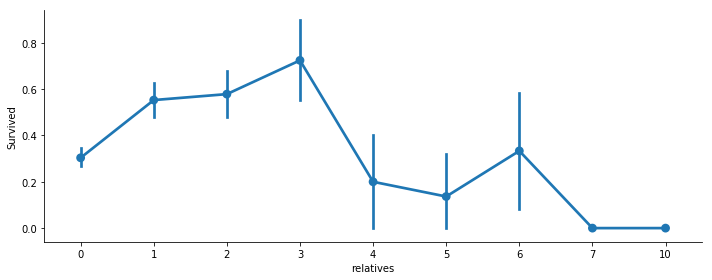

In [148]:
axes = sns.factorplot('relatives','Survived', data=train, aspect = 2.5, )
axes

From the diag we can see that the probabilty of survival was higher with 1 to 3 realitves, but a lower one if you had less than 1 or more than 3 (except for some cases with 6 relatives).

In [149]:
train.drop('SibSp', axis=1, inplace=True)
train.drop('Parch', axis=1, inplace=True)
test.drop('SibSp', axis=1, inplace=True)
test.drop('Parch', axis=1, inplace=True)

# Title(names)

To extract some useful information out of the names columns we shall extract the titles from each name.

In [150]:

data = [train, test]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)    

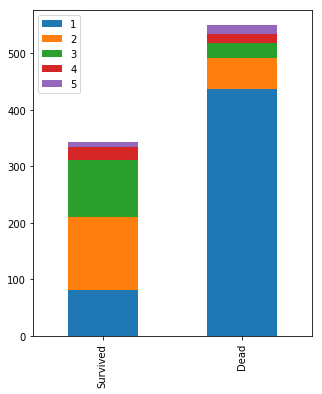

In [151]:
bar_chart('Title')

From the graph we can tell that the people with the title 'Mr' made up the biggest proportion of the dead while while the biggest proportion of those who survived are those with title 'Miss'.

In [152]:
#train['Fare']=train['Fare'].astype('int')
test['Fare']=test['Fare'].astype('int')

In [153]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
Pclass        418 non-null int64
Sex           418 non-null int64
Age           418 non-null int32
Fare          418 non-null int32
Embarked_S    418 non-null int64
Embarked_C    418 non-null int64
Embarked_Q    418 non-null int64
relatives     418 non-null int64
not_alone     418 non-null int32
Title         418 non-null int64
dtypes: int32(3), int64(7)
memory usage: 27.8 KB


We now have clean data that is in numeric form. We can now proceed to building predictive models using machine learning algorithms,
Logistic regression, KNN, Random forest. We shall then compare and take up the one that performs best.

# Machine learning

In [155]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


In [156]:
y=train.pop('Survived')
x=train

In [157]:
x.head()

,Pclass,Sex,Age,Fare,Embarked_S,Embarked_C,Embarked_Q,relatives,not_alone,Title
0,3,0,25.140620,7.2500,0,0,0,1,0,1
1,1,1,38.233441,71.2833,0,0,0,1,0,3
2,3,1,25.140620,7.9250,0,0,0,0,1,2
3,1,1,38.233441,53.1000,0,0,0,1,0,3
4,3,0,25.140620,8.0500,0,0,0,0,1,1


In [158]:
ss=StandardScaler()
xs=ss.fit_transform(x)

In [160]:
xs[:5]

array([[ 0.82737724,  1.35557354, -0.7717261 , -0.48885426,  0.        ,
         0.        ,  0.        , -0.56097483,  0.81192233,  0.26383235],
       [-1.56610693,  1.35557354,  1.6616677 ,  0.42073024,  0.        ,
         0.        ,  0.        ,  0.05915988, -1.2316449 ,  1.2352151 ],
       [ 0.82737724, -0.73769513, -0.7717261 , -0.48633742,  0.        ,
         0.        ,  0.        , -0.56097483,  0.81192233, -0.7075504 ]])

### Logistic regression

In [167]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(xs,y)

sc=round(log.score(xs,y)*100,2)
sc

79.46

### Random forest

In [168]:
from sklearn.ensemble import RandomForestClassifier

ranclf =RandomForestClassifier(n_estimators=20, max_depth=None,min_samples_split=2, random_state=0)
ranclf.fit(xs,y)
acc_ranclf = round(ranclf.score(xs, y) * 100, 2)
acc_ranclf

92.37

### KNN

In [181]:
from sklearn.neighbors import KNeighborsClassifier
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(xs,y)
neigh.score(xs,y)

0.8630751964085297

In [178]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(xs,y)
    yhat=neigh.predict(xs)
    mean_acc[n-1] = metrics.accuracy_score(y, yhat)

    
    #std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.87766554, 0.8664422 , 0.87542088, 0.8630752 , 0.86083053,
       0.84960718, 0.84736251, 0.84511785, 0.84848485])

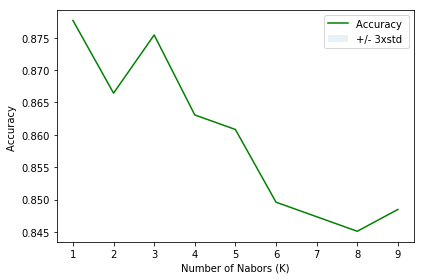

In [179]:
import matplotlib.pyplot as plt
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

We should use k=3 seeing that the accuracy on the plot is highest there being 87.54

In [176]:
from sklearn import metrics
metrics.accuracy_score(y, neigh.predict(xs))

0.8484848484848485

From the scores of the three different algorithms we discover that the Random Forest performs really well with 92.37%. This would produce some really good predictions.